In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
sns.set()
import matplotlib.pyplot as plot
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
from sklearn.linear_model import LinearRegression , RidgeCV, LassoCV, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor 

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV,cross_val_predict,cross_validate)
from sklearn.model_selection import RepeatedKFold

In [3]:
#pip install yellowbrick==0.9.1 scikit-learn==0.22.2

In [4]:
#conda install -c districtdatalabs yellowbrick 

In [5]:
#conda update scikit-learn

In [6]:
#conda install -c districtdatalabs yellowbrick

In [7]:
#pip install yellowbrick

In [8]:
#cross_val_predict?

# Read data

In [9]:
basicdf=pd.read_csv('2020-2019wk.csv')

In [10]:
basicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   n                       2476 non-null   object 
 1   Overall Score           2204 non-null   float64
 2   International Students  1748 non-null   float64
 3   International Faculty   1729 non-null   float64
 4   Faculty Student         1750 non-null   float64
 5   Citations per Faculty   1749 non-null   float64
 6   Academic Reputation     1603 non-null   float64
 7   Employer Reputation     1672 non-null   float64
dtypes: float64(7), object(1)
memory usage: 154.9+ KB


In [11]:
basicdf.head()

,n,Overall Score,International Students,International Faculty,Faculty Student,Citations per Faculty,Academic Reputation,Employer Reputation
0,AALBORG UNIVERSITY,31.60,39.7,75.7,43.9,33.5,17.0,34.4
1,AALTO UNIVERSITY,50.80,39.4,85.4,56.6,68.6,36.4,48.2
2,AARHUS UNIVERSITY,50.70,23.7,85.0,51.5,50.7,49.6,48.6
3,ABERYSTWYTH UNIVERSITY,26.50,48.3,66.5,33.8,45.0,10.7,6.6
4,ABO AKADEMI UNIVERSITY,22.35,21.7,40.7,44.3,29.5,NaN,NaN


In [12]:
basicdf.rename(columns={'n':'University Name'},inplace=True)

In [13]:
basicdf.rename(columns={'Citations per Faculty':'CitationsPerFaculty'},inplace=True)

In [14]:
basicdf.rename(columns={'Overall Score':'OverallScore'},inplace=True)

In [15]:
basicdf.rename(columns={'International Students':'InternationalStudents','International Faculty'
                       :'InternationalFaculty','Faculty Student':'FacultyStudent'
                       ,'Academic Reputation':'AcademicReputation','Employer Reputation':'EmployerReputation'},inplace=True)

In [16]:
basicdf.head()

,University Name,OverallScore,InternationalStudents,InternationalFaculty,FacultyStudent,CitationsPerFaculty,AcademicReputation,EmployerReputation
0,AALBORG UNIVERSITY,31.60,39.7,75.7,43.9,33.5,17.0,34.4
1,AALTO UNIVERSITY,50.80,39.4,85.4,56.6,68.6,36.4,48.2
2,AARHUS UNIVERSITY,50.70,23.7,85.0,51.5,50.7,49.6,48.6
3,ABERYSTWYTH UNIVERSITY,26.50,48.3,66.5,33.8,45.0,10.7,6.6
4,ABO AKADEMI UNIVERSITY,22.35,21.7,40.7,44.3,29.5,NaN,NaN


# EDA : Data Cleaning
### droping any null values

In [17]:
basicdf.isnull().sum()

University Name            0
OverallScore             272
InternationalStudents    728
InternationalFaculty     747
FacultyStudent           726
CitationsPerFaculty      727
AcademicReputation       873
EmployerReputation       804
dtype: int64

In [18]:
basicdf.dropna(inplace=True)

In [19]:
basicdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 2475
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   University Name        1224 non-null   object 
 1   OverallScore           1224 non-null   float64
 2   InternationalStudents  1224 non-null   float64
 3   InternationalFaculty   1224 non-null   float64
 4   FacultyStudent         1224 non-null   float64
 5   CitationsPerFaculty    1224 non-null   float64
 6   AcademicReputation     1224 non-null   float64
 7   EmployerReputation     1224 non-null   float64
dtypes: float64(7), object(1)
memory usage: 86.1+ KB


Cheking null values

In [20]:
basicdf.isnull().sum()

University Name          0
OverallScore             0
InternationalStudents    0
InternationalFaculty     0
FacultyStudent           0
CitationsPerFaculty      0
AcademicReputation       0
EmployerReputation       0
dtype: int64

In [21]:
basicdf.head()

,University Name,OverallScore,InternationalStudents,InternationalFaculty,FacultyStudent,CitationsPerFaculty,AcademicReputation,EmployerReputation
0,AALBORG UNIVERSITY,31.6,39.7,75.7,43.9,33.5,17.0,34.4
1,AALTO UNIVERSITY,50.8,39.4,85.4,56.6,68.6,36.4,48.2
2,AARHUS UNIVERSITY,50.7,23.7,85.0,51.5,50.7,49.6,48.6
3,ABERYSTWYTH UNIVERSITY,26.5,48.3,66.5,33.8,45.0,10.7,6.6
15,AL-FARABI KAZAKH NATIONAL UNIVERSITY,41.3,23.0,34.4,99.3,1.2,33.4,48.9


#### To make sure that we have all numerical values, will set the university names as the index.

In [22]:
basicdf.set_index('University Name',inplace=True)

In [23]:
basicdf

,OverallScore,InternationalStudents,InternationalFaculty,FacultyStudent,CitationsPerFaculty,AcademicReputation,EmployerReputation
University Name,,,,,,,
AALBORG UNIVERSITY,31.60,39.70,75.7,43.90,33.50,17.00,34.40
AALTO UNIVERSITY,50.80,39.40,85.4,56.60,68.60,36.40,48.20
AARHUS UNIVERSITY,50.70,23.70,85.0,51.50,50.70,49.60,48.60
ABERYSTWYTH UNIVERSITY,26.50,48.30,66.5,33.80,45.00,10.70,6.60
AL-FARABI KAZAKH NATIONAL UNIVERSITY,41.30,23.00,34.4,99.30,1.20,33.40,48.90
...,...,...,...,...,...,...,...
ZHEJIANG UNIVERSITY,67.50,45.10,86.9,60.90,69.20,65.60,85.00
Zhejiang University,69.95,64.25,90.2,69.75,75.40,56.40,77.85
École Normale Supérieure de Lyon,48.75,28.90,35.6,98.15,59.45,30.85,25.60


In [24]:
basicdf.describe()

,OverallScore,InternationalStudents,InternationalFaculty,FacultyStudent,CitationsPerFaculty,AcademicReputation,EmployerReputation
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,43.307128,44.659783,49.842770,50.742606,45.144812,41.268505,40.504779
std,18.453239,28.814671,31.107133,30.252818,26.301395,25.264881,25.702383
min,15.900000,1.000000,1.300000,2.500000,1.000000,2.100000,1.100000
25%,28.700000,20.300000,22.100000,23.900000,23.800000,20.475000,20.037500
50%,37.100000,39.350000,46.575000,45.800000,44.450000,35.450000,34.825000
75%,52.750000,64.925000,75.325000,80.262500,65.362500,57.925000,56.400000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# EDA : Visulaizing data
#### (correlation matrix, correlation heatmap)

In [25]:
basicdf.shape

(1224, 7)

In [26]:
basicdf.corr()

,OverallScore,InternationalStudents,InternationalFaculty,FacultyStudent,CitationsPerFaculty,AcademicReputation,EmployerReputation
OverallScore,1.000000,0.518075,0.492289,0.362878,0.545031,0.829739,0.789581
InternationalStudents,0.518075,1.000000,0.691390,0.054538,0.336771,0.439861,0.394752
InternationalFaculty,0.492289,0.691390,1.000000,-0.021572,0.448899,0.372000,0.377278
FacultyStudent,0.362878,0.054538,-0.021572,1.000000,-0.184147,0.088527,0.053109
CitationsPerFaculty,0.545031,0.336771,0.448899,-0.184147,1.000000,0.488698,0.406006
AcademicReputation,0.829739,0.439861,0.372000,0.088527,0.488698,1.000000,0.727720
EmployerReputation,0.789581,0.394752,0.377278,0.053109,0.406006,0.727720,1.000000


<AxesSubplot:>

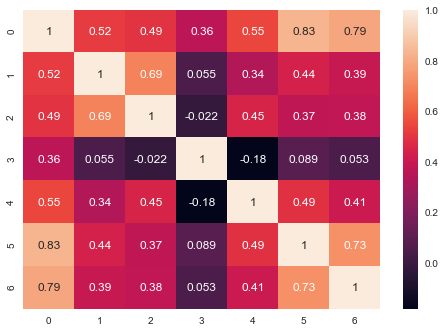

In [164]:
sns.heatmap(np.corrcoef(basicdf.T),annot=True, xticklabels=True, yticklabels=True)

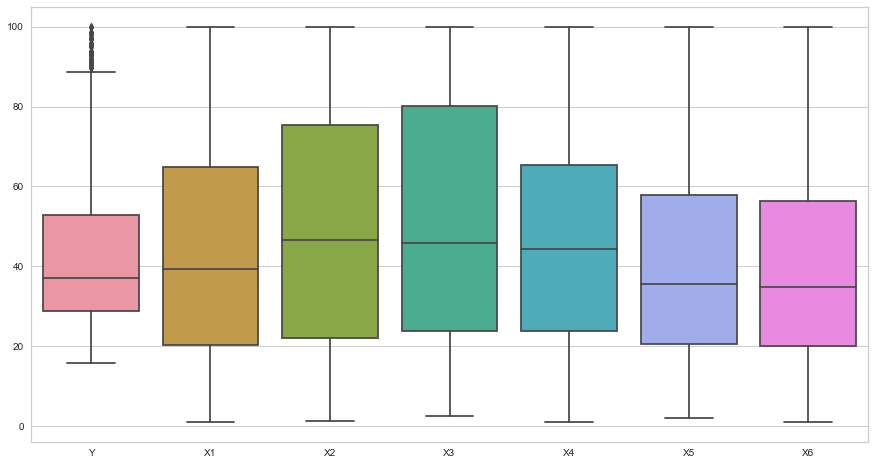

In [274]:
plot.figure(figsize=(15,8))
sns.boxplot(data=basicdf);

<AxesSubplot:>

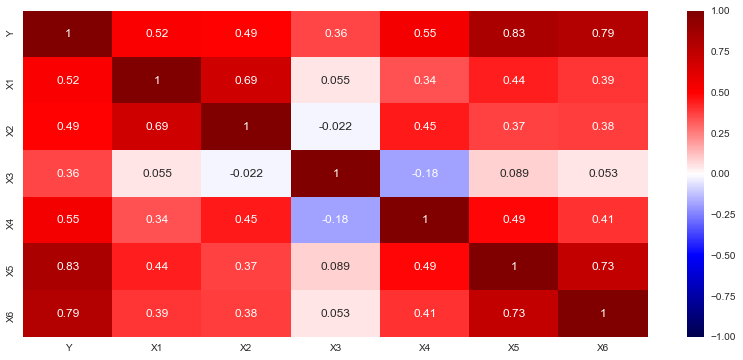

In [193]:
plot.figure(figsize=(14, 6))
sns.heatmap(basicdf.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

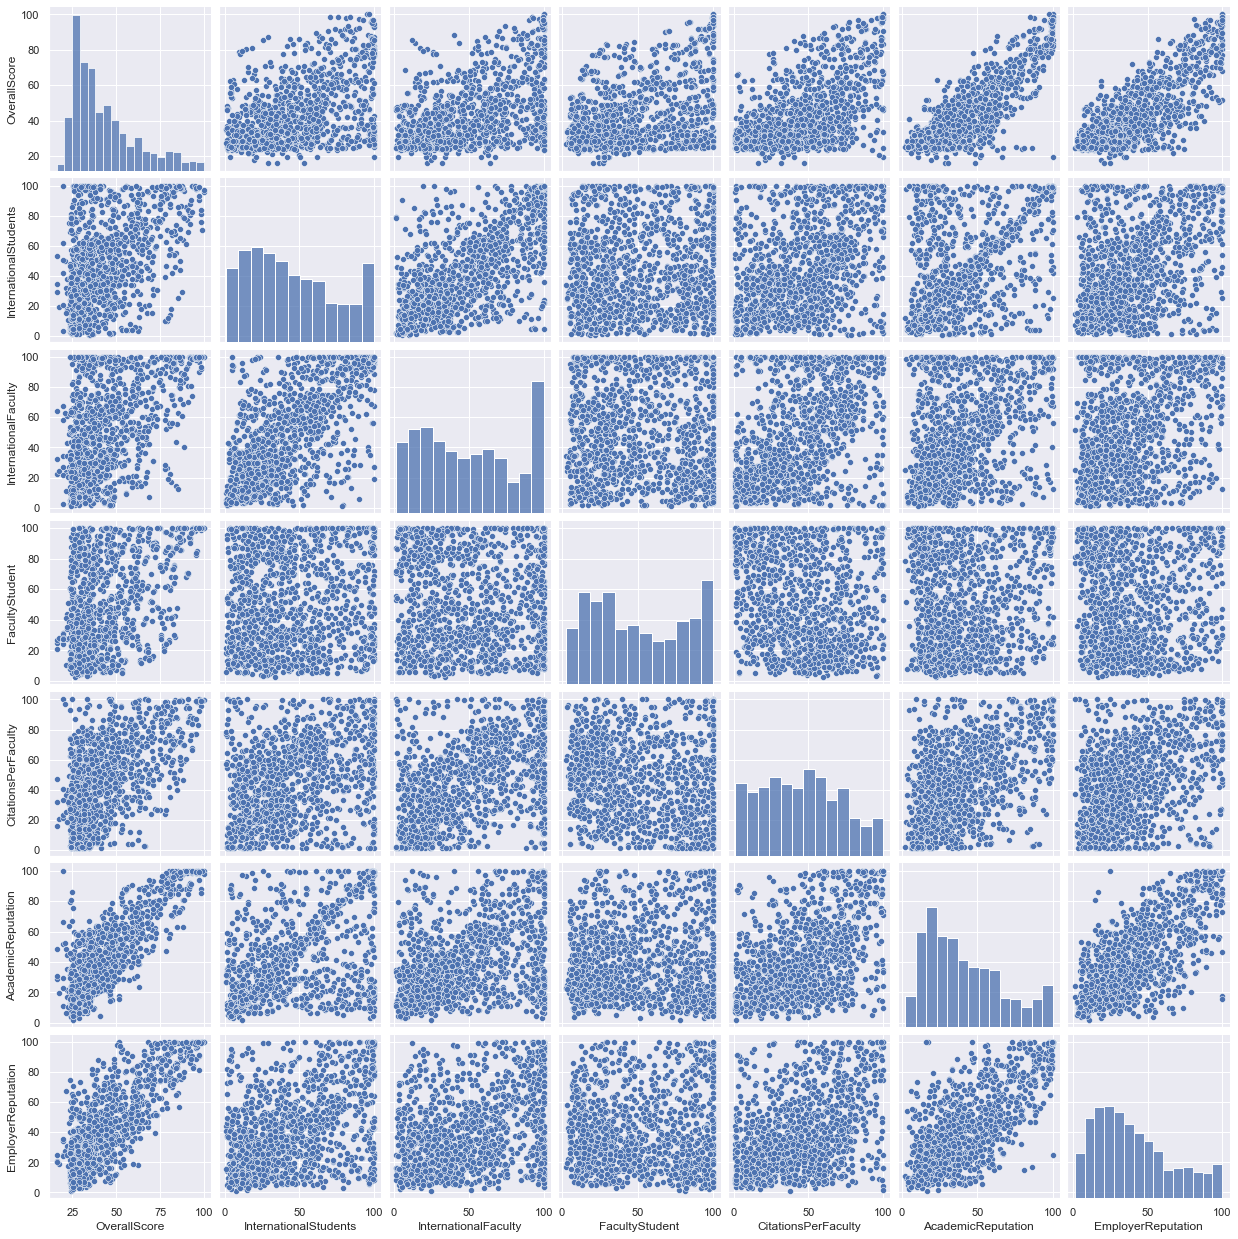

In [28]:
sns.pairplot(basicdf)

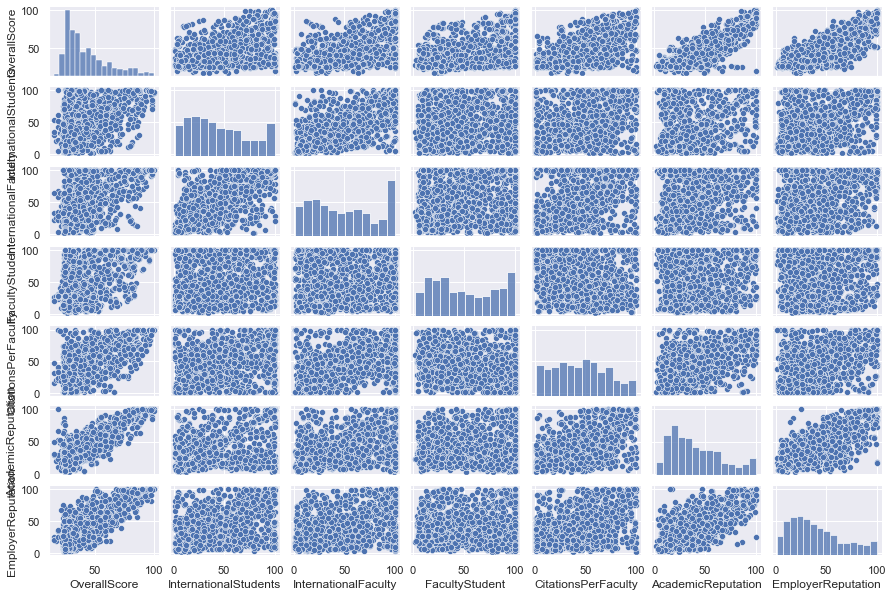

In [29]:
sns.pairplot(basicdf, height=1.2, aspect=1.5);

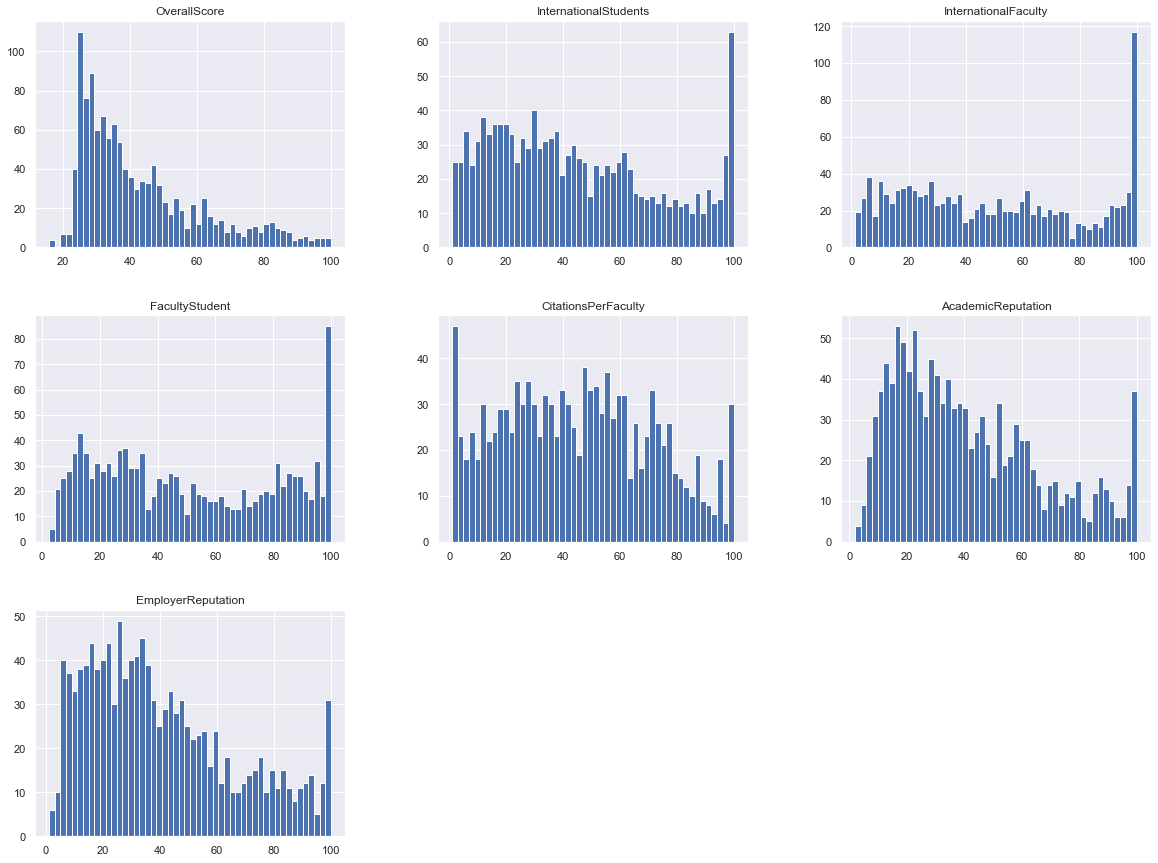

In [30]:
basicdf.hist(bins=50, figsize=(20,15));

# Trying to implement Feature enginering(transformation)

In [31]:
df = basicdf
df = (df - df.min()) / (df.max() - df.min())
mul_col = df['InternationalStudents'] * df['InternationalFaculty']
df['S_F'] = mul_col
df.drop(columns = {'InternationalStudents', 'InternationalFaculty'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, AALBORG UNIVERSITY to �COLE POLYTECHNIQUE F�D�RALE DE LAUSANNE (EPFL)
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OverallScore         1224 non-null   float64
 1   FacultyStudent       1224 non-null   float64
 2   CitationsPerFaculty  1224 non-null   float64
 3   AcademicReputation   1224 non-null   float64
 4   EmployerReputation   1224 non-null   float64
 5   S_F                  1224 non-null   float64
dtypes: float64(6)
memory usage: 66.9+ KB


Split manually

In [32]:
import patsy
basicdf = basicdf.set_axis(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], axis = 1)
y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data = basicdf, return_type = 'dataframe')

In [33]:
X

,Intercept,X1,X2,X3,X4,X5,X6
University Name,,,,,,,
AALBORG UNIVERSITY,1.0,39.70,75.7,43.90,33.50,17.00,34.40
AALTO UNIVERSITY,1.0,39.40,85.4,56.60,68.60,36.40,48.20
AARHUS UNIVERSITY,1.0,23.70,85.0,51.50,50.70,49.60,48.60
ABERYSTWYTH UNIVERSITY,1.0,48.30,66.5,33.80,45.00,10.70,6.60
AL-FARABI KAZAKH NATIONAL UNIVERSITY,1.0,23.00,34.4,99.30,1.20,33.40,48.90
...,...,...,...,...,...,...,...
ZHEJIANG UNIVERSITY,1.0,45.10,86.9,60.90,69.20,65.60,85.00
Zhejiang University,1.0,64.25,90.2,69.75,75.40,56.40,77.85
École Normale Supérieure de Lyon,1.0,28.90,35.6,98.15,59.45,30.85,25.60


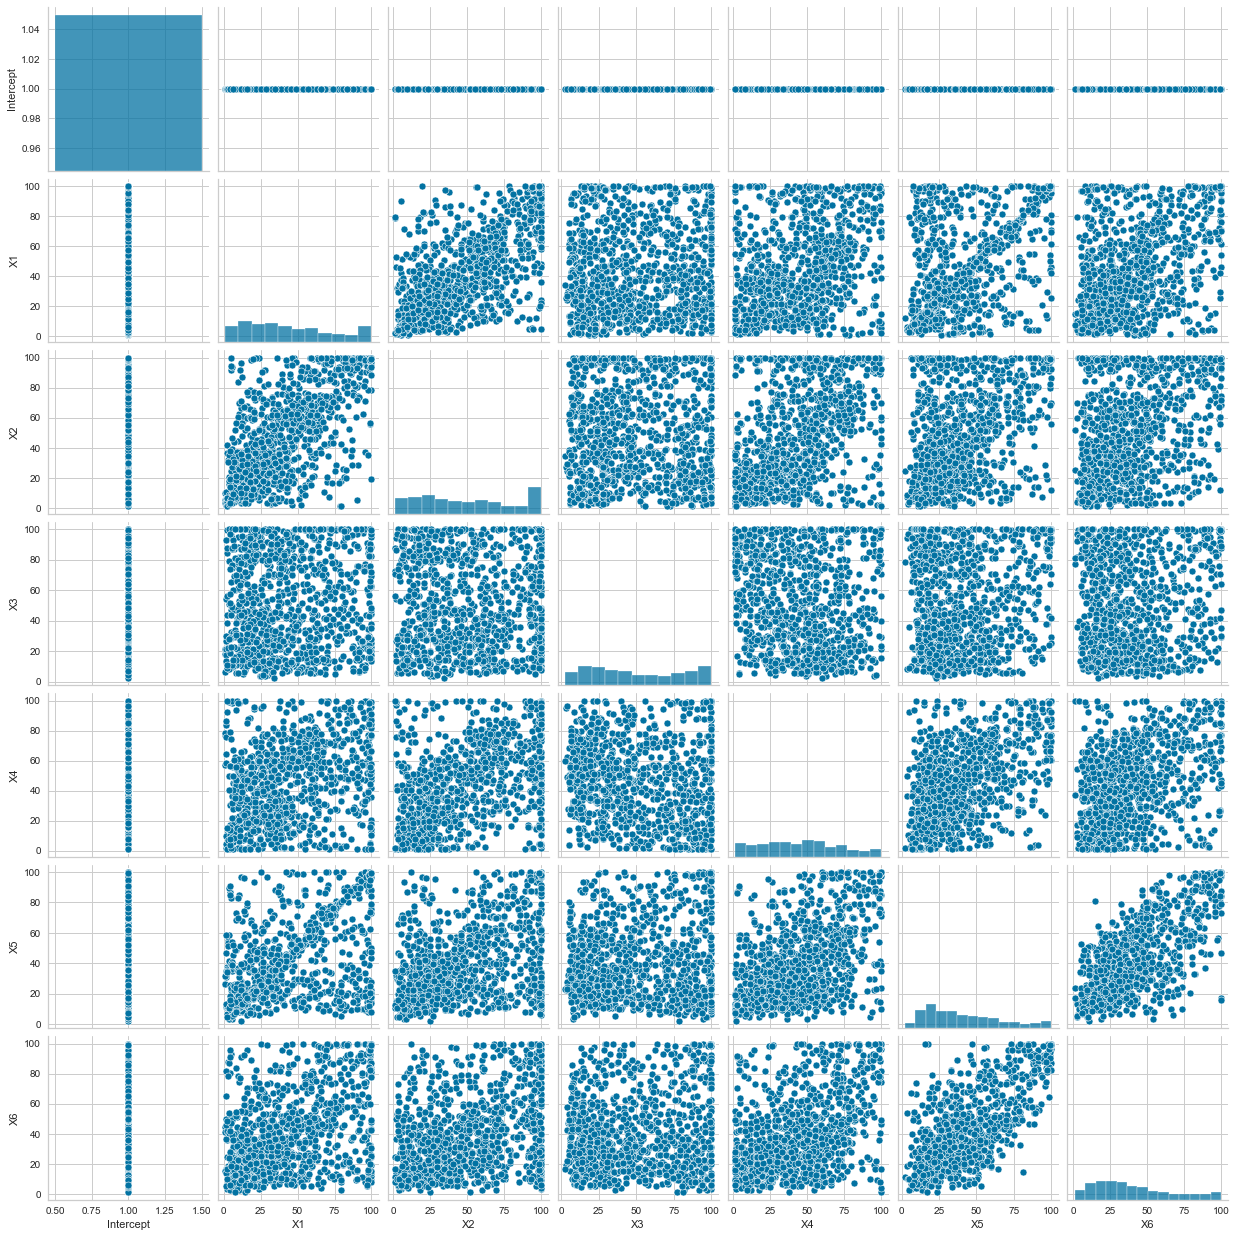

In [132]:
sns.pairplot(X)

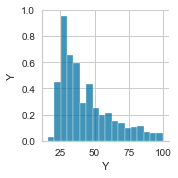

In [119]:
sns.pairplot(y)

In [35]:
y.describe()

,Y
count,1224.000000
mean,43.307128
std,18.453239
min,15.900000
25%,28.700000
50%,37.100000
75%,52.750000
max,100.000000


In [185]:
y

,Y
University Name,
TEXAS A&M UNIVERSITY,43.50
University of Oxford,97.00
ASTON UNIVERSITY,29.00
SCUOLA SUPERIORE SANT'ANNA PISA,47.70
New York University (NYU),78.25
...,...
"University of Missouri, Columbia",21.60
University of Turku,35.10
Université de Montréal,50.75


In [137]:
#howwplot.boxplot(X, notch=None, sym=None, vert=None, whis=None, positions=None)

In [158]:
#plot.figure(figsize=(15,8))
#ax = sns.boxplot(x = 'X1', y = 'y', data = basicdf)
#temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

# Stage I -> Pre-Processing

# 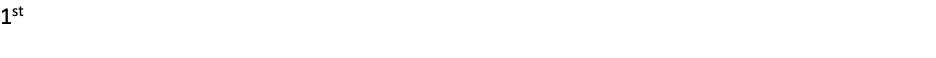Split Data

In [36]:
#Split the data for X and X test and y , y test
X,X_test,y,y_test=train_test_split(X,y,test_size=0.20, random_state=42)#20% FOR TEST 80% FOR X AND y

#Using X , y as my train set 

#X_train,y_train=train_test_split(X,y, test_size=0.20, random_state=42)#20% for validation data set 60% for traind data

In [37]:
X.shape

(979, 7)

In [38]:
y.shape

(979, 1)

In [39]:
X_test.shape

(245, 7)

In [40]:
y_test.shape

(245, 1)

# 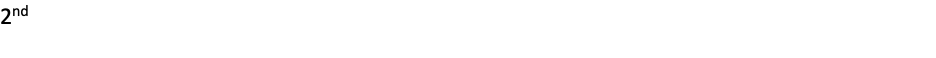 Split validation test from train and apply CV

## 1- Linear Regression

In [41]:
#cross validation using linear regression if it give me good result i willl use it
# if not i will see if its Overfitting i will perform lasso or ridge
# if its underfitting to minimize the high variance , low bais
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state = 1)
#cross_val_score(model, X, y, # estimator, features, target
             #   cv=5, # number of folds 
             #   scoring='r2') # scoring metric


## Calculate the mean

In [42]:
#calculate the mean
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(scores)
print("Linear Regression Mean Score: ", np.mean(scores))

[0.92354741 0.9201862  0.89007591 0.92320214 0.9361212 ]
Linear Regression Mean Score:  0.9186265716519803


Range of values is good since its on the same point

### Fit the model

In [43]:
#Bulid the linear regression model on the train set
model.fit(X,y)
#### Calculate the Score for validation
#print(f'Ridge Regression test R^2: {model.score(X_train, y_train):.3f}')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
model.fit(X,y)
model.score(X,y)

0.9215931902935

#### Extract feature coefficients and intercept from fit model

In [44]:
# extract feature coefficients and intercept from fit model
print(model.intercept_)
print(model.coef_)

[-0.48340317]
[[0.         0.04606169 0.04380787 0.21423435 0.16132929 0.29290446
  0.23346786]]


In [45]:
#preds = model.cross_val_predict(X) # generate predictions (on training data) using fit model
#sns.jointplot(preds,y, kind='reg')

# Score the linear regression model on the validation set

In [46]:
#Score the linear regression model on the valdition set

print(f'Linear Regression R^2: {model.score(X, y):.3f}')

Linear Regression R^2: 0.922


In [47]:
model.score(X, y)

0.9215931902935

In [48]:
y_predl=model.predict(X_test)

In [49]:
model.score(X_test,y_test)

0.8670339174785836

#### Check the RMSE (root mean squared error) on the training data for Linear regression model

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Check the RMSE (root mean squared error) on the training data for Linear regression model
#sqrt(mean_squared_error(y_test,y_predl))

#### Check the MAE (Mean Absolute Error) on the training data for Linear regression model

In [51]:
from sklearn.metrics import mean_absolute_error as mae
#calculate MAE
mae(y_test, y_predl)
print(f'RMSE Of Linear Reg:{sqrt(mean_squared_error(y_test,y_predl))}')
print(f'MAE Of Linear Reg:{mae(y_test, y_predl)}')

RMSE Of Linear Reg:6.630973843807429
MAE Of Linear Reg:4.346348761996378


## Visulaizing the True and Predicet

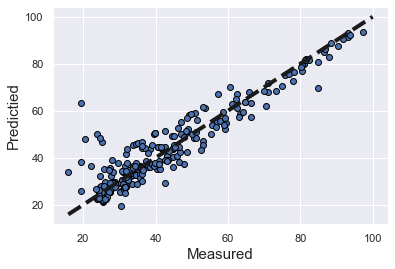

In [52]:
fig ,ax=plot.subplots()
ax.scatter(y_test,y_predl,edgecolors=(0,0,0))
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured',size=15)
ax.set_ylabel('Predictied',size=15)
plot.show()

<AxesSubplot:xlabel='Y'>

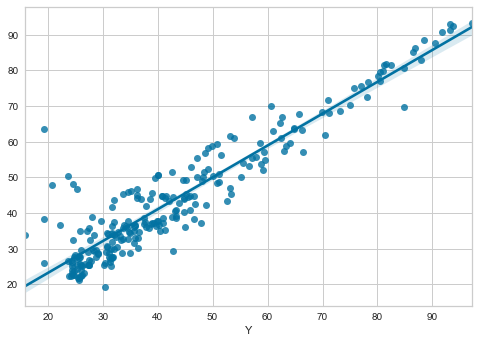

In [144]:
sns.regplot(y_test,y_predl)

In [55]:
#fig ,ax=sns.regplot()
#ax.scatter(y_test,y_predl,edgecolors=(0,0,0))
#ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
#ax.set_xlabel('Measured',size=15)
#ax.set_ylabel('Predictied',size=15)
#plt.show()

Okay, that's what our finished product looks like. But how does it work? How does something find the best line for a given dataset?

First some math terms we'll use: 
- $X$: input features of data
- $y$: target value of data
- $\hat{y}$: predicted output from the model

# Now , Let's Build different models after linear regression model to know what is the best model

## 2- Ridge Model 

In [60]:
#Rigde for train set
#kf = KFold(n_splits=5, shuffle=True, random_state = 1)
Ridgemodel=RidgeCV()

## Calculate the mean of Ridge R^2 

In [61]:
#Fit Ridge model
Ridgemodel.fit(X,y)

/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1398: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [62]:
# extract feature coefficients and intercept from fit model
print(Ridgemodel.intercept_)
print(Ridgemodel.coef_)

[-0.48311952]
[[0.         0.04606294 0.04380856 0.21423213 0.16132791 0.29290027
  0.23346717]]


## Evaluating Ridge model

In [63]:
Ridgemodel.score(X,y)

0.9215931902339651

In [64]:
y_predR=Ridgemodel.predict(X_test)

In [65]:
Ridgemodel.score(X_test,y_test)

0.867034543205024

#### Check the RMSE (root mean squared error) on the training data for Ridge regression model

In [66]:
sqrt(mean_squared_error(y_test, y_predR))

6.630958241405439

#### Check the MAE (Mean Absolute Error) on the training data for ridge regression model

In [67]:
mae(y_test, y_predR)

4.3463449109756045

In [68]:
print(f'RMSE Ridge Reg:{sqrt(mean_squared_error(y_test, y_predR)):.3f}')
print(f'MAE of Ridge Reg:{mae(y_test, y_predR):.3f}')

RMSE Ridge Reg:6.631
MAE of Ridge Reg:4.346


In [69]:
print(f'Ridge Regression R^2: {Ridgemodel.score(X, y):.3f}')

Ridge Regression R^2: 0.922


In [72]:
y_predS=Ridgemodel.predict(X_test)

/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y'>

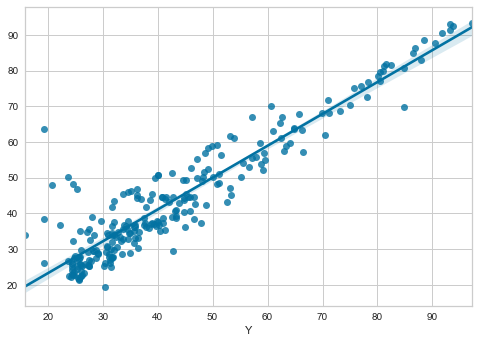

In [73]:
sns.regplot(y_test,y_predR)

# 3- Lasso Model

In [74]:
#Lasso Regression 

Lassomodel=LassoCV()

In [75]:
Lassomodel.fit(X,y)

/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [76]:
# extract feature coefficients and intercept from fit model
print(Lassomodel.intercept_)
print(Lassomodel.coef_)

-0.41736851112510465
[0.         0.04584591 0.04378054 0.21376465 0.16086635 0.2928852
 0.23322632]


In [77]:
ss=Lassomodel.score(X,y)
ss

0.9215915355920178

In [78]:
Lassomodel.score(X_test,y_test)

0.8670894393266911

In [79]:
y_predS=Lassomodel.predict(X_test)

#### Check the RMSE (root mean squared error) on the training data for Lasso regression model

In [80]:
sqrt(mean_squared_error(y_test, y_predS))

6.629589271303661

#### Check the MAE (Mean Absolute Error) on the training data for LASSO regression model

In [81]:
mae(y_test, y_predS)

4.345890321353924

In [82]:
print(f'RMSE Lasso Reg:{sqrt(mean_squared_error(y_test, y_predS)):.3f}')
print(f'MAE of Lasso Reg:{mae(y_test, y_predS):.3f}')

RMSE Lasso Reg:6.630
MAE of Lasso Reg:4.346


/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y'>

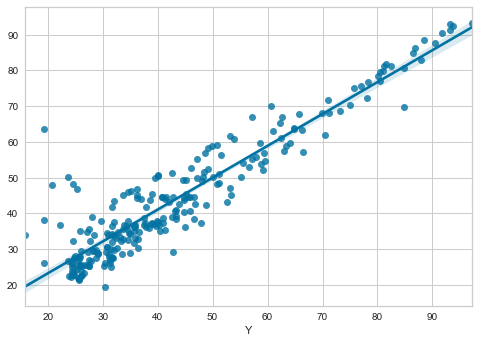

In [83]:
sns.regplot(y_test,y_predS)

# 4- Elastic net Model

In [84]:
#ElatsicNet Regression 

ela=ElasticNet(alpha=1.0, l1_ratio=0.5)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate model
scores =cross_val_score(ela, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
print(scores)
print("Elastic net Mean Score: ", np.mean(scores))
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[-3.84010943 -3.68260565 -4.05787621 -3.67122922 -3.46661149]
Elastic net Mean Score:  -3.743686400211648
Mean MAE: 3.744 (0.197)


## Calculate the mean of Elastic net

In [85]:
print(np.mean(cross_val_score(ela, X, y, cv=5, scoring='r2')))

0.9186336776414578


In [86]:
ela.fit(X,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
print(ela.intercept_)
print(ela.coef_)

[-0.38518518]
[0.         0.0458554  0.04380037 0.21352678 0.16067493 0.29266676
 0.23312707]


In [88]:
se=ela.score(X,y)
se

0.9215894207925738

In [89]:
y_predE=ela.predict(X_test)

In [90]:
ela.score(X_test,y_test)

0.8671339247335292

#### Check the RMSE (root mean squared error) on the training data for Elastic Net regression model

In [91]:
sqrt(mean_squared_error(y_test, y_predE))

6.628479710648346

In [92]:
y_test

,Y
University Name,
The University of Queensland,75.7
INDIAN INSTITUTE OF TECHNOLOGY BOMBAY (IITB),48.2
Emory University,49.1
Tomsk Polytechnic University,28.7
Universidad de Navarra,38.5
...,...
THE UNIVERSITY OF MELBOURNE,80.1
SWINBURNE UNIVERSITY OF TECHNOLOGY,28.7
Yonsei University,58.8


#### Check the MAE (Mean Absolute Error) on the training data for Elastic Net regression model

In [93]:
mae(y_test, y_predE)

4.345599687976083

In [94]:
print(f'RMSE of Elastic net Reg:{sqrt(mean_squared_error(y_test, y_predE)):.3f}')
print(f'MAE of Elastic net Reg:{mae(y_test, y_predE):.3f}')

RMSE of Elastic net Reg:6.628
MAE of Elastic net Reg:4.346


## Predict Y based on X_test On Elastic Net Model

In [95]:
#y_prede=cross_val_predict(ela, X, y, cv=5)

# 5- Polynomial Model

In [96]:
polylinear = LinearRegression()
poly = PolynomialFeatures(degree=3)
poly_train=poly.fit_transform(X)
cross_val_score(polylinear, poly_train, y, cv=5, scoring='r2')

array([0.94075564, 0.91755943, 0.88083933, 0.94520167, 0.94160116])

In [97]:
from sklearn.preprocessing import PolynomialFeatures
xp , yp = basicdf.drop('Y', axis = 1), basicdf['Y']





xp, xp_test, yp, yp_test = train_test_split(xp , yp, test_size = .2, random_state = 42)



xp_train, xp_val, yp_train, yp_val = train_test_split(xp, yp, test_size=.25, random_state = 3)

poly = PolynomialFeatures(degree = 3)
x_train_poly = poly.fit_transform(xp_train.values)
x_val_poly = poly.transform(xp_val.values)
x_test_poly = poly.transform(xp_test.values)
lm_poly = LinearRegression()

In [169]:
xp_train

,X1,X2,X3,X4,X5,X6
University Name,,,,,,
FLINDERS UNIVERSITY,74.80,74.20,13.40,39.60,13.70,10.20
HITOTSUBASHI UNIVERSITY,26.80,25.20,34.60,4.40,21.50,63.90
Universidade Federal de São Paulo,7.10,6.00,88.80,8.50,6.85,8.05
Vrije Universiteit Amsterdam,30.15,34.80,46.60,44.80,28.30,34.75
Arizona State University,49.10,45.55,12.20,66.20,51.80,50.25
...,...,...,...,...,...,...
SAINT-PETERSBURG STATE UNIVERSITY,31.80,6.00,95.20,4.80,35.30,31.30
GWANGJU INSTITUTE OF SCIENCE AND TECHNOLOGY (GIST),9.00,9.90,39.80,100.00,9.70,4.00
Jilin University,10.50,12.95,52.70,22.90,9.95,17.95


In [98]:
lm_poly.fit(x_train_poly, yp_train)
print(f'Degree 3 polynomial regression val r2: {lm_poly.score(x_val_poly, yp_val):.3f}')

Degree 3 polynomial regression val r2: 0.934


In [99]:
yp_pred = lm_poly.predict(x_test_poly)

In [100]:
sqrt(mean_squared_error(yp_test, yp_pred))

5.805373381256643

In [101]:
mae(yp_test, yp_pred)

3.6660346656848124

In [102]:
lm_poly.score(x_test_poly,yp_test)

0.8980830170963551

<AxesSubplot:xlabel='Y'>

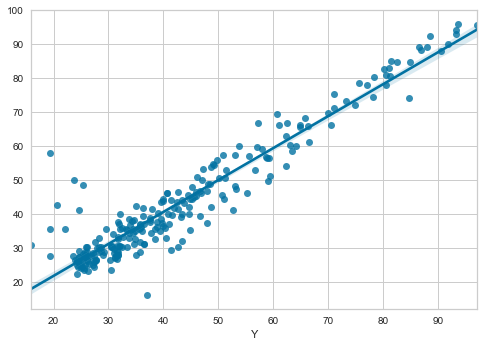

In [160]:
sns.regplot(yp_test,yp_pred)

In [103]:
print(f'RMSE of Polynomila Reg: {sqrt(mean_squared_error(yp_test, yp_pred))}')
print(f'MAE of Polynomila Reg: {mae(yp_test, yp_pred)}')

RMSE of Polynomila Reg: 5.805373381256643
MAE of Polynomila Reg: 3.6660346656848124


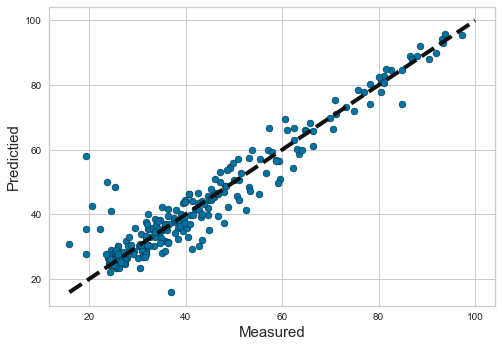

In [157]:
fig ,ax=plot.subplots()
ax.scatter(yp_test,yp_pred,edgecolors=(0,0,0))
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured',size=15)
ax.set_ylabel('Predictied',size=15)
plot.show()

# Predictions

In [264]:
dftry=pd.DataFrame({
    'X1':[1,2,3,4,5],
    'X2':[4,3,3,6,5],
    'X3':[7,2,9,4,5],
    'X4':[3,2,3.9,4,5],
    'X5':[7,7.2,9,4,5],
    'X6':[1,8,3,4,5]
})

predc = pd.DataFrame()
predc["Real Score"] = [90, 80 , 70 , 60, 50]
pd.set_option('display.max_columns', 30)


#preds["LinearRegressionScaledLog10"] = 10**lm_scaled.predict(dftry)
#predc = np.arange(10).reshape((-1, 1))
#y_prednew = lm_poly.intercept_ + np.sum(lm_poly.coef_ * x, axis=1)
predc["PolynomialRegression"] =  lm_poly.predict(poly.transform(dftry))
y_prednew = lm_poly.intercept_ + np.sum(lm_poly.coef_)
print(f'Coefficient of Polynomial Regression model Prediction is :{y_prednew}')
#preds["RidgeScaledLog10"] = 10**lm_reg_scaled.predict(dftry)
#preds["LassoCVScaledLog10"] = 10**lasso.predict(np.array(dftry))

predc.style.format('{:,.0f}')


Coefficient of Polynomial Regression model Prediction is :18.7415280445655


,Real Score,PolynomialRegression
0,90,20
1,80,18
2,70,20
3,60,19
4,50,19


In [236]:
dftry1=pd.DataFrame({
    'X1':[9],
    'X2':[8],
    'X3':[7],
    'X4':[3],
    'X5':[4],
    'X6':[1]
})

In [237]:
lm_poly.predict(poly.transform(dftry))

array([14.63213108,  4.88231837, 19.79970016, 18.65654978, 18.7011728 ])

In [166]:
print(lm_poly.coef_)

[ 1.05113356e-12 -5.55676086e-03 -5.78859666e-02 -8.54869647e-02
  1.22133380e-01  2.11651992e-01 -3.07247548e-01 -2.96416447e-04
  4.65105247e-06  1.51160498e-04 -2.98523324e-04 -5.93670317e-03
  7.22594302e-03 -2.63016305e-04  1.75938277e-03 -3.01901909e-03
  1.49112920e-03  3.39642323e-03  1.04368537e-03  1.37966127e-03
  8.87711766e-04  5.51801658e-03 -2.55226610e-04 -3.11096579e-03
  3.17336154e-03  1.36239678e-03  3.95472582e-03  1.06179443e-03
 -3.61951941e-06  1.12158959e-05  3.34419306e-06  2.94409563e-05
  5.82624988e-05 -6.73450276e-05 -1.05186204e-05  7.08733020e-06
 -1.74348331e-05 -4.56256272e-05  4.76723906e-05  7.73860794e-06
 -1.10219088e-06 -5.31760266e-06 -1.94714967e-05  4.45177011e-06
 -2.40642384e-05 -3.37397913e-07 -7.40237607e-05  1.93968505e-04
 -1.03714409e-04  1.37926228e-05 -1.51091850e-05  3.72911194e-05
  2.68070065e-05 -7.49858217e-05 -4.97716837e-06 -2.13657561e-06
  1.06627547e-05 -3.94610083e-06 -6.42805662e-06 -3.56796260e-06
 -3.47091376e-06  5.99328

# 6- Random Forest Regression Model

In [105]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1) 



 

### Calculate the mean of Random Forest Regression Model R^2 

In [106]:
np.mean(cross_val_score(regressor, X, y, cv=kf, scoring='r2'))

/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/bushrausif/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selec

0.9181061017834026

In [107]:
# fit the regressor with x and y data 
regressor.fit(X, y)   

<ipython-input-107-7daeae71f667>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [108]:
# extract feature coefficients and intercept from fit model


In [109]:
sf=regressor.score(X,y)
sf

0.9900054662815545

In [110]:
#Predction
y_predF=regressor.predict(X_test)

In [161]:
regressor.score(X_test,y_test)

0.8887319051559504

In [ ]:
lm_poly.predict([])

#### Check the RMSE (root mean squared error) on the training data for Random Forest regression model

In [111]:
sqrt(mean_squared_error(y_test, y_predF))

6.065857505879333

#### Check the MAE (Mean Absolute Error) on the training data for Random Forest regression model

In [112]:
mae(y_test, y_predF)

3.8153918367346917

In [113]:
print(f'MAE of Random Forest Reg: {sqrt(mean_squared_error(y_test, y_predF))}')
print(f'MAE of Random Forest Reg: {mae(y_test, y_predF)}')

MAE of Random Forest Reg: 6.065857505879333
MAE of Random Forest Reg: 3.8153918367346917


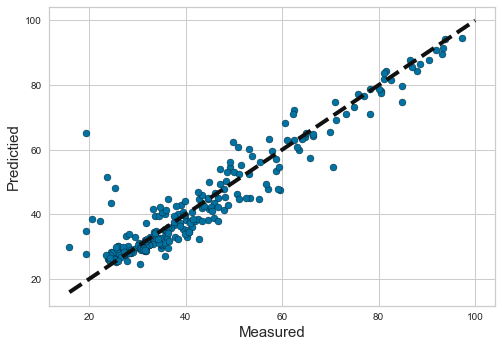

In [114]:
fig ,ax=plot.subplots()
ax.scatter(y_test,y_predF,edgecolors=(0,0,0))
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured',size=15)
ax.set_ylabel('Predictied',size=15)
plot.show()

#### Stage II -> Train + Validate

**1- Fit for x_traind , y_traind**
**2- Predect y_pred_val(x_val)**
**3- Caluclate R-squared , ValidationError for y_pred_val,y_val**
**4- Select the best model > R-squared is High or Low**

In [194]:
#from sklearn.metrics import r2_score, mean_squared_error

#y_predl=model.predict(X_test)
#print("Linear Regression:", r2_score(sl, y_predl))


#y_predS=Lassomodel.predict(X_test)
#print("Lasso Regression:", r2_score(sr, y_predR))

#y_predR=Ridgemodel.predict(X_test)
#print("Ridge Regression:", r2_score(ss, y_predS))

#y_predE=ela.predict(X_test)
#print("ElasticNet Regression:", r2_score(se, y_predE))

#y_predF=regressor.predict(X_test)
#print("Randonm Forest Regression:", r2_score(sf, y_predF))